In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, FunctionTransformer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,RocCurveDisplay
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

warnings.simplefilter("always", category=FutureWarning)

In [ ]:
churn_80 = pd.read_csv('churn-bigml-80.csv')
churn_80.shape
churn_80.info()
churn_80.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## **EXPLORATORY DATA ANALYSIS**

### **Univariate Data Visualization**

In [ ]:
# Describe the data
churn_80.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


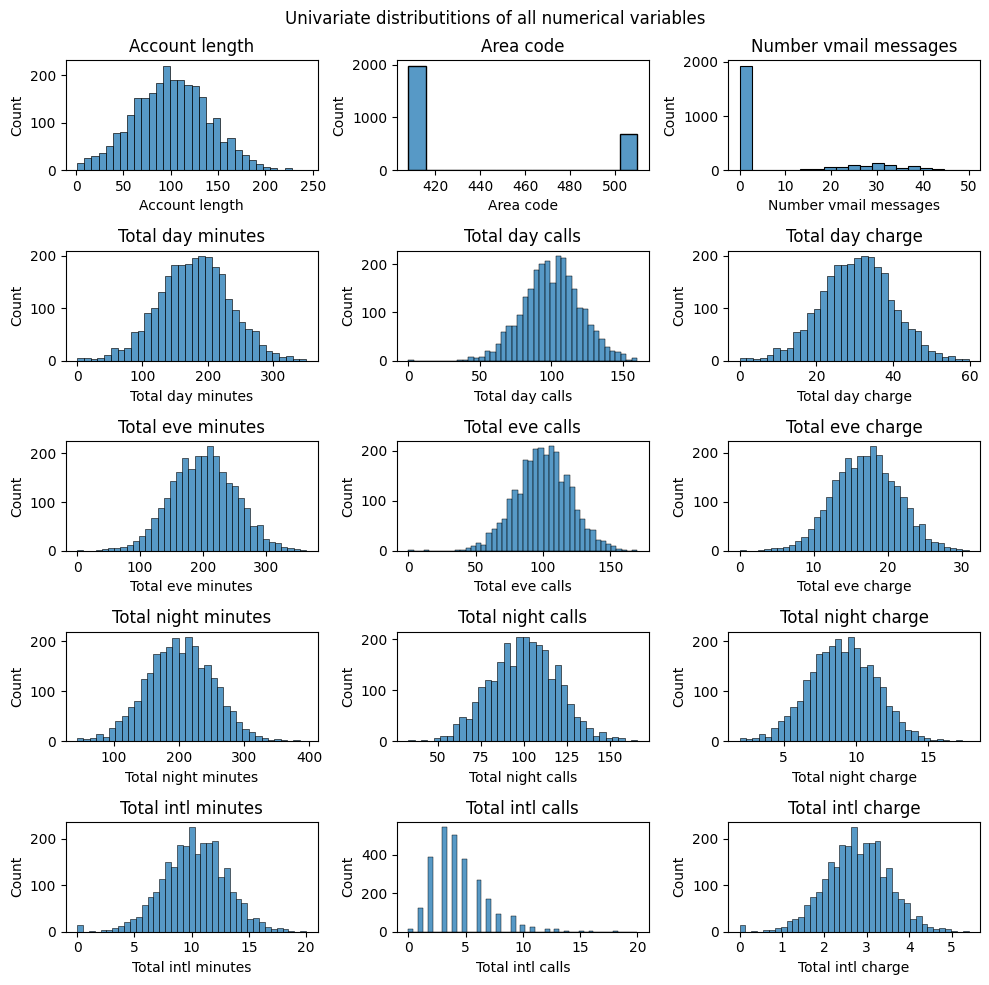

In [ ]:
# Visualiza all numerical values
churn_80["Customer service calls"] = churn_80["Customer service calls"].astype('object')
churn_80_numerical = churn_80.select_dtypes(include='number')

nCol = 3
nRow = m.ceil(len(churn_80_numerical.columns)/nCol)
figure, axes = plt.subplots(nRow, nCol, figsize=(10, 10))
axes = axes.flatten()

for i,col in enumerate(churn_80_numerical.columns):
    sns.histplot(churn_80_numerical[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    figure.delaxes(axes[j])
plt.suptitle("Univariate distributitions of all numerical variables")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

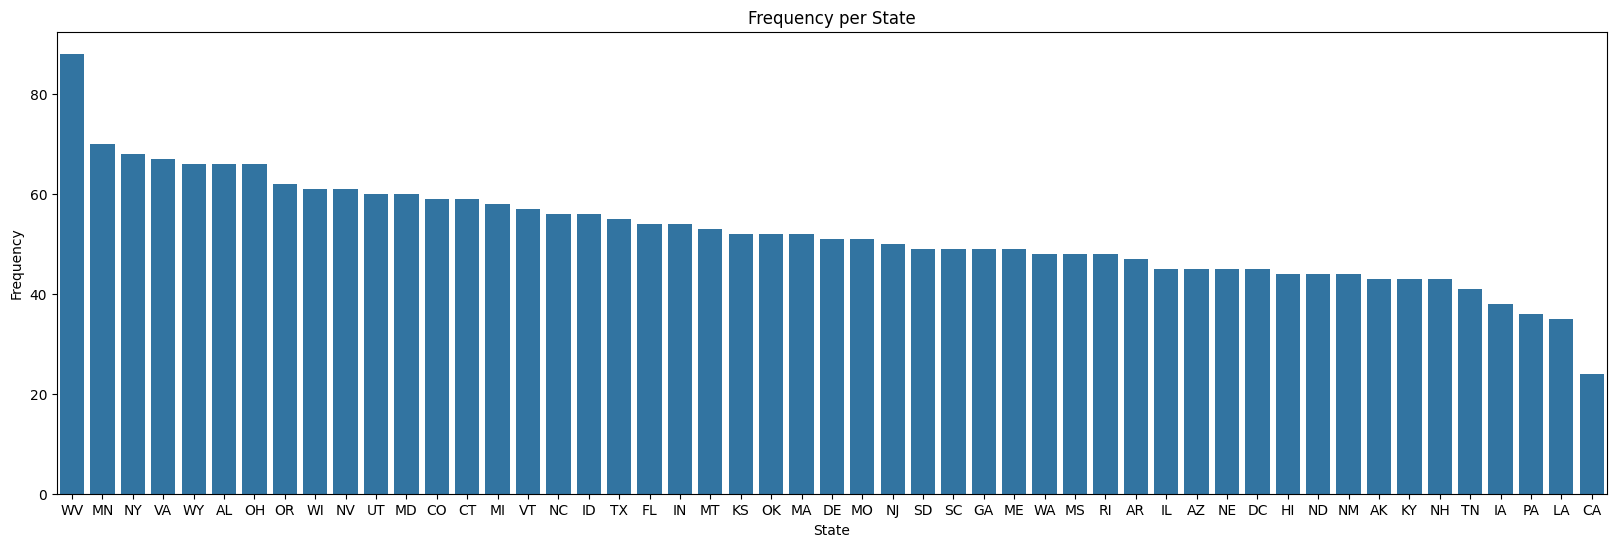

In [ ]:
# Visualize all state values
churn_80_obj = churn_80.select_dtypes(include='object')
plt.figure(figsize=(20, 6))
plt.title("Frequency per State")
sns.barplot(x=churn_80_obj[churn_80_obj.columns[0]].value_counts().index,
            y=churn_80_obj[churn_80_obj.columns[0]].value_counts().values)
plt.ylabel("Frequency")

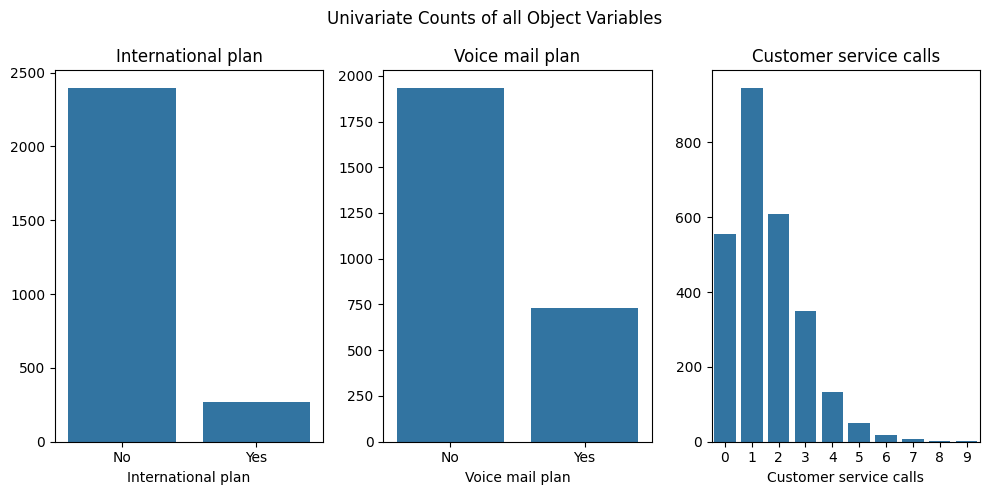

In [ ]:
# Visualize all other objects
churn_80_obj = churn_80.select_dtypes(include='object').drop(columns='State')

nCol = 3
nRow = m.ceil(len(churn_80_obj.columns) / nCol)
figure, axes = plt.subplots(nRow, nCol, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(churn_80_obj.columns):
    dummyCount = churn_80_obj[col].value_counts()
    sns.barplot(x=dummyCount.index, y=dummyCount.values, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    figure.delaxes(axes[j])

plt.suptitle("Univariate Counts of all Object Variables")
plt.tight_layout()
plt.show()


### **Bivariate Data Visualization**

In [ ]:
fig = px.scatter_matrix(churn_80,
                        dimensions=churn_80_numerical.columns.tolist(),
                        color="Churn")
fig.update_layout(title="Pairwise Scatter Plot Matrix",
                  width=2600,
                  height=2600
                  )
fig.show()

In [ ]:
long_churn_80_data = churn_80_numerical.melt(var_name="variable", value_name="value")
fig = px.box(long_churn_80_data,
             x="variable",
             y="value",
             color="variable")
fig.update_layout(title="Box Plot of Numerical Variables")
fig.show()

In [ ]:
corrols = churn_80_numerical.corr()
fig = px.imshow(corrols,text_auto=True,color_continuous_scale='RdBu_r',title="Correlation Matrix Heatmap")
fig.show()

In [ ]:
churn_80["Churn"].value_counts()

,count
Churn,
False,2278
True,388


Value counts reveal that there exists a considerable amount of class imbalance, to avoid this resampling shall be performed where there shall be an undersampling for the observations of False or an oversampling for the observations that were identified to be True.

### **Pipeline Creation for Pre-processing, Modeling, and Evaluations**

### **Pre-processing Pipelines**

In [ ]:
(churn_80.select_dtypes(include='number') <= 0).any()

,0
Account length,False
Area code,False
Number vmail messages,True
Total day minutes,True
Total day calls,True
Total day charge,True
Total eve minutes,True
Total eve calls,True
Total eve charge,True
Total night minutes,False


In [ ]:
y_train = churn_80["Churn"]
X_train = churn_80.drop(columns=["Churn"])

X_train["Area code"] = X_train["Area code"].astype('object')
binaryCols = X_train.select_dtypes(include="object").columns.tolist()
binaryCols.remove("State")
binaryCols.remove("Area code")
binaryCols.remove("Customer service calls")
categoricalCols = ["State","Area code","Customer service calls"]
numericalCols = X_train.select_dtypes(include="number").columns.tolist()

def relab(X):
  X = X.copy()
  if isinstance(X, pd.Series):
    X = X.replace({"False":0, "True":1})

  elif isinstance(X, pd.DataFrame):
    for col in X.columns:
      X[col] = X[col].replace({"No":0, "Yes":1})

  return X

binarPipe = Pipeline(steps=[
    ('lab', FunctionTransformer(relab))
])
catiPipe = Pipeline(steps=[
    ('oneHot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('binary', binarPipe, binaryCols),
    ('categorical', catiPipe, categoricalCols),
    ('numerical', 'passthrough', numericalCols)
])

churn_80_prepross = preprocessor.fit_transform(X_train)
onh_colnames = list(preprocessor.named_transformers_['categorical'].named_steps['oneHot'].get_feature_names_out(categoricalCols))
churn_80_prepross = pd.DataFrame(churn_80_prepross,columns=binaryCols+onh_colnames+numericalCols)

churn_80_prepross["Churn"] = relab(y_train)
churn_80_prepross.head()

<ipython-input-12-46a7181552a9>:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-12-46a7181552a9>:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,International plan,Voice mail plan,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Churn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,False
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,False
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,False
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,False


In [ ]:
y_train = churn_80_prepross["Churn"]
X_train = churn_80_prepross.drop(columns=["Churn"])
resamPipe = imbPipeline([
    ('under', RandomUnderSampler(random_state=42,sampling_strategy=0.8)),
    ('over', SMOTE(random_state=42,sampling_strategy=1))
])
X_train_resam, y_train_resam = resamPipe.fit_resample(X_train, y_train)

In [ ]:
y_train_resam.value_counts()

,count
Churn,
False,485
True,485


### **Modeling Pipelines**

In [ ]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
log_model = LogisticRegression(max_iter=1000)
ridge_model = Ridge()

param_grid = {
    'model__C': [0.01, 0.1, 1],
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__max_iter': [200,300,500,1000],
}

numPipe = Pipeline(steps=[
    ('yeojo', PowerTransformer(method="yeo-johnson",standardize=True))
])
ignoreCol = [col for col in X_train_resam.columns.to_list() if col not in numericalCols]
prepro2 = ColumnTransformer(
    transformers=[
        ('num', numPipe, numericalCols),
        ('passthrough', 'passthrough', ignoreCol)
    ]
)

logPipe = Pipeline(steps=[
    ('prepro', prepro2),
    ('model', log_model)
])

grid_model = GridSearchCV(logPipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

ridPipe = Pipeline(steps=[
    ('prepro', prepro2),
    ('model', ridge_model)
])

allModels = {
    "dt":dt_model,
    "rf":rf_model,
    "gb":gb_model,
    "log":logPipe,
    "ridge":ridPipe,
    "grid":grid_model
}

for name, model in allModels.items():
    model.fit(X_train_resam, y_train_resam)
    print(f"Fitted {name}")

Fitted dt
Fitted rf
Fitted gb
Fitted log
Fitted ridge


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


660 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

Fitted grid


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



### **Evaluation Pipeline**

In [ ]:
# Evaluation on training data
y_preds_train = []
for name, model in allModels.items():
    y_pred = model.predict(X_train_resam)
    info_model_pred = {"model_name":name, "y_pred":y_pred}
    y_preds_train.append(info_model_pred)
    print(f"Train Prediction Done for {name}")

Train Prediction Done for dt
Train Prediction Done for rf
Train Prediction Done for gb
Train Prediction Done for log
Train Prediction Done for ridge
Train Prediction Done for grid


In [ ]:
def evaluateModel(modelName,y_pred,y_true):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  f1 = f1_score(y_true,y_pred)

  print(f"Model {modelName} is evaluated!")
  return [accuracy,precision,recall,f1]

modelPerf = {
    "model_name":[],
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1":[]
}

for i,y_pred in enumerate(y_preds_train):
  if i != 4:
    accuracy,precision,recall,f1 = evaluateModel(y_pred["model_name"],y_pred["y_pred"],y_train_resam)
    modelPerf["model_name"].append(y_pred["model_name"])
    modelPerf["accuracy"].append(accuracy)
    modelPerf["precision"].append(precision)
    modelPerf["recall"].append(recall)
    modelPerf["f1"].append(f1)

modelPerf_df = pd.DataFrame(modelPerf)

Model dt is evaluated!
Model rf is evaluated!
Model gb is evaluated!
Model log is evaluated!
Model grid is evaluated!


In [ ]:
modelPerf_df.head()

,model_name,accuracy,precision,recall,f1
0,dt,1.000000,1.000000,1.000000,1.000000
1,rf,1.000000,1.000000,1.000000,1.000000
2,gb,0.944330,0.979955,0.907216,0.942184
3,log,0.847423,0.854737,0.837113,0.845833
4,grid,0.847423,0.859275,0.830928,0.844864


# **Model Testing**

In [ ]:
churn_20 = pd.read_csv('churn-bigml-20.csv')
churn_20["Customer service calls"] = churn_20["Customer service calls"].astype('object')
churn_20.shape
churn_20.info()
churn_20.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
y_test = churn_20["Churn"]
X_test = churn_20.drop(columns=["Churn"])

X_test["Area code"] = X_test["Area code"].astype('object')
binaryCols20 = X_test.select_dtypes(include="object").columns.tolist()
binaryCols20.remove("State")
binaryCols20.remove("Area code")
binaryCols20.remove("Customer service calls")
categoricalCols20 = ["State","Area code","Customer service calls"]
numericalCols20 = X_test.select_dtypes(include="number").columns.tolist()

churn_20_prepross = preprocessor.fit_transform(X_test)
onh_colnames20 = list(preprocessor.named_transformers_['categorical'].named_steps['oneHot'].get_feature_names_out(categoricalCols20))
churn_20_prepross = pd.DataFrame(churn_20_prepross,columns=binaryCols20+onh_colnames20+numericalCols20)

churn_20_prepross["Churn"] = relab(y_test)
churn_20_prepross.head()

<ipython-input-12-46a7181552a9>:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-12-46a7181552a9>:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,International plan,Voice mail plan,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,317.8,97.0,27.01,160.6,128.0,7.23,5.4,9.0,1.46,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.3,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,215.1,109.0,18.28,178.7,90.0,8.04,11.1,1.0,3.00,False


In [ ]:
y_test = churn_20_prepross["Churn"]
X_test = churn_20_prepross.drop(columns=["Churn"])

col_before = 'Customer service calls_8'
insert_index = X_test.columns.get_loc(col_before) + 1
X_test.insert(insert_index, 'Customer service calls_9', [0]*len(X_test))

y_preds_test = []
for name, model in allModels.items():
    y_pred = model.predict(X_test)
    info_model_pred = {"model_name":name, "y_pred":y_pred}
    y_preds_test.append(info_model_pred)
    print(f"Test Prediction Done for {name}")

Test Prediction Done for dt
Test Prediction Done for rf
Test Prediction Done for gb
Test Prediction Done for log
Test Prediction Done for ridge
Test Prediction Done for grid


In [ ]:
modelPerfTest = {
    "model_name":[],
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1":[]
}
for i,y_pred in enumerate(y_preds_test):
  if i != 4:
    accuracy,precision,recall,f1 = evaluateModel(y_pred["model_name"],y_pred["y_pred"],y_test)
    modelPerfTest["model_name"].append(y_pred["model_name"])
    modelPerfTest["accuracy"].append(accuracy)
    modelPerfTest["precision"].append(precision)
    modelPerfTest["recall"].append(recall)
    modelPerfTest["f1"].append(f1)

modelPerfTest_df = pd.DataFrame(modelPerfTest)

Model dt is evaluated!
Model rf is evaluated!
Model gb is evaluated!
Model log is evaluated!
Model grid is evaluated!


In [ ]:
modelPerfTest_df

,model_name,accuracy,precision,recall,f1
0,dt,0.778111,0.370732,0.800000,0.506667
1,rf,0.860570,0.506849,0.778947,0.614108
2,gb,0.872564,0.532468,0.863158,0.658635
3,log,0.799100,0.397906,0.800000,0.531469
4,grid,0.806597,0.406593,0.778947,0.534296


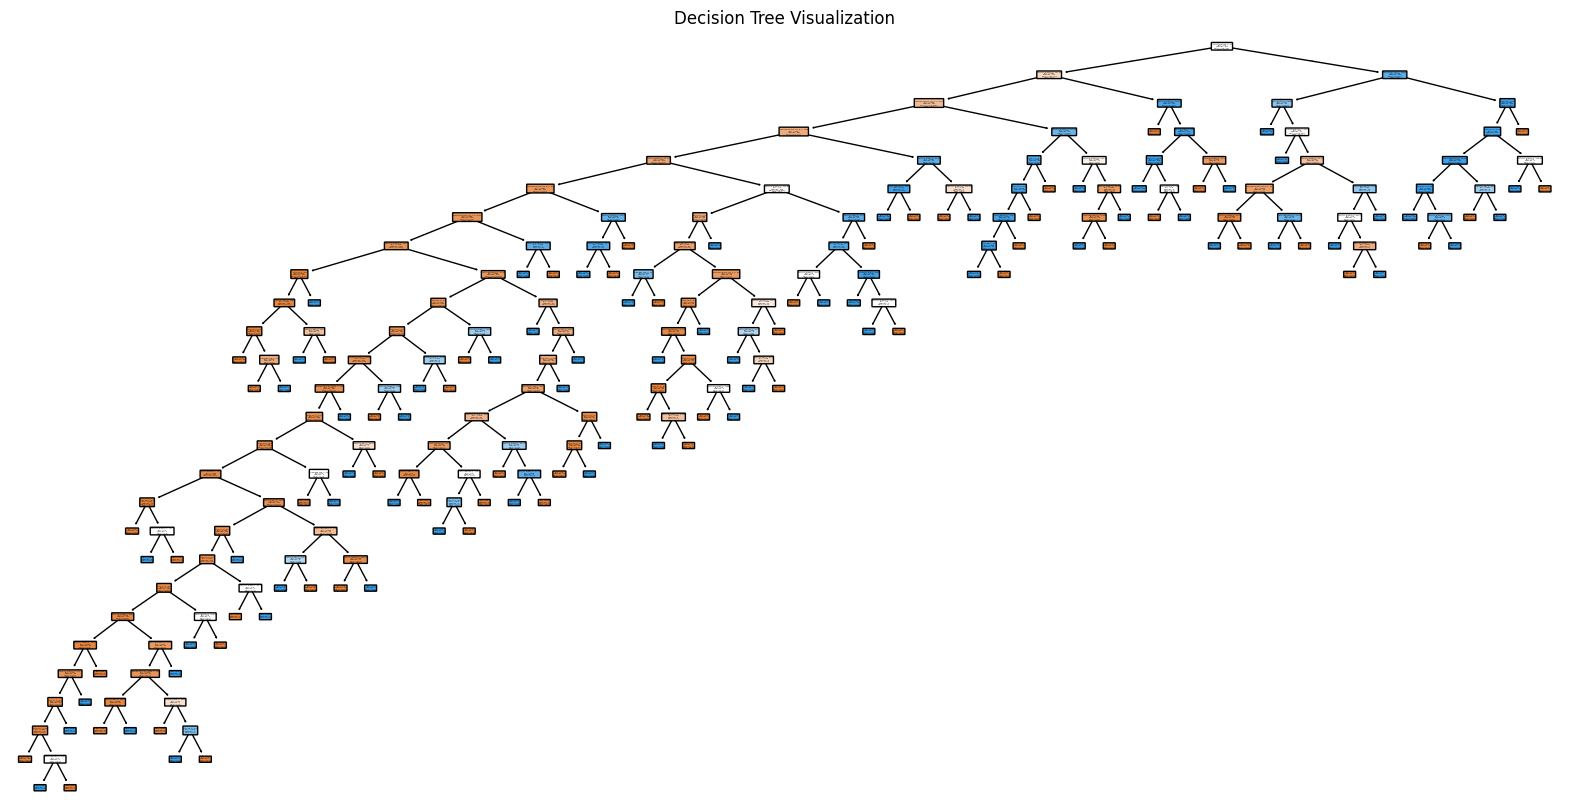

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train_resam.columns,
    class_names=["False", "True"],
    filled=True,
    rounded=True,
)
plt.title("Decision Tree Visualization")
plt.show()

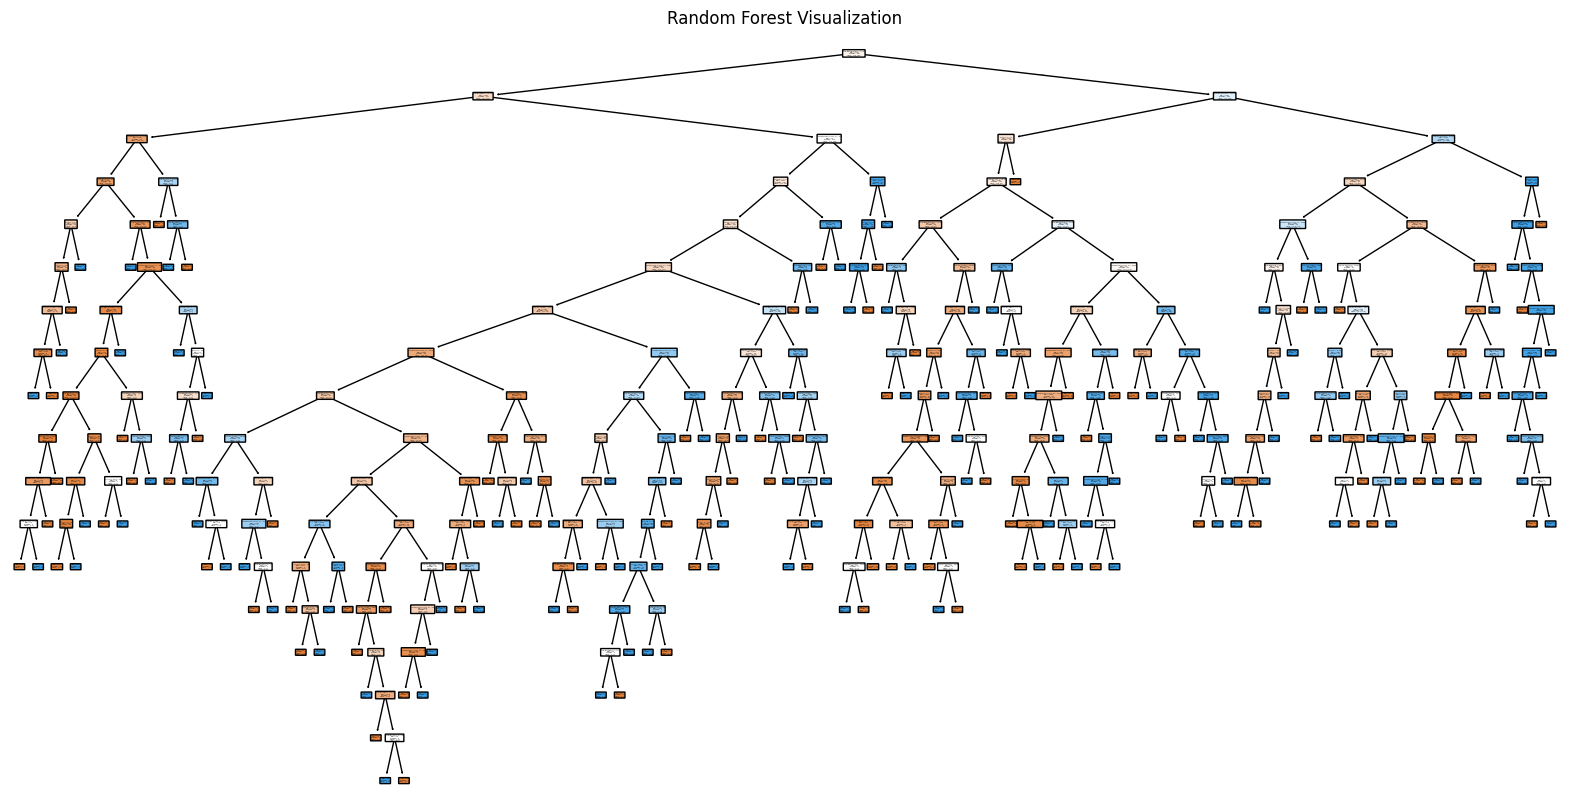

In [ ]:
estimators_of_rf = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(
    estimators_of_rf,
    feature_names=X_train_resam.columns,
    class_names=["False", "True"],
    filled=True,
    rounded=True,
)
plt.title("Random Forest Visualization")
plt.show()

In [ ]:
imp_features_per_model = {
    "features":X_train_resam.columns.tolist()
}
for name, model in allModels.items():
  try:
    imp = model.feature_importances_
    imp_features_per_model[name] = imp
    print(f"Feature Importance for {name}_model is successfully calculated!")
  except:
    if isinstance(model, GridSearchCV):
      imp = model.best_estimator_.named_steps["model"].coef_[0]
      imp = imp/abs(imp).sum()
      imp_features_per_model[name] = imp
      print(f"Feature Importance for {name}_model is successfully calculated!")
    else:
      imp = model.named_steps["model"].coef_[0]
      imp = imp/abs(imp).sum()
      imp_features_per_model[name] = imp
    print(f"Feature Importance for {name}_model is successfully calculated!")

imp_features_per_model = pd.DataFrame(imp_features_per_model)

Feature Importance for dt_model is successfully calculated!
Feature Importance for rf_model is successfully calculated!
Feature Importance for gb_model is successfully calculated!
Feature Importance for log_model is successfully calculated!
Feature Importance for ridge_model is successfully calculated!
Feature Importance for grid_model is successfully calculated!
Feature Importance for grid_model is successfully calculated!


In [ ]:
columnsToScale = imp_features_per_model.columns.tolist()[1:]
scaler = StandardScaler()
imp_features_per_model[columnsToScale] = scaler.fit_transform(imp_features_per_model[columnsToScale])
imp_features_per_model_long = imp_features_per_model.melt(id_vars="features",var_name="model",value_name="standardized importance")

fig_scat = px.scatter(
        imp_features_per_model_long,
        x="features",
        y="standardized importance",
        title=f"Importance of each feature per model",
        color="model")
fig_scat